In [61]:
# Import required libraries and dependencies
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [62]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [63]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [64]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [65]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)
scaled_data_df = pd.DataFrame(scaled_data, \
    columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
# Set the coin_id column as index
crypto_names = market_data_df['name'] \
    if 'name' in market_data_df.columns else None

# Display sample data
scaled_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [66]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)


c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

    k     inertia
0   1  287.000000
1   2  198.571818
2   3  145.635748
3   4   79.022435
4   5   66.217780
5   6   59.139070
6   7   48.406314
7   8   38.993588
8   9   34.400595
9  10   28.573603


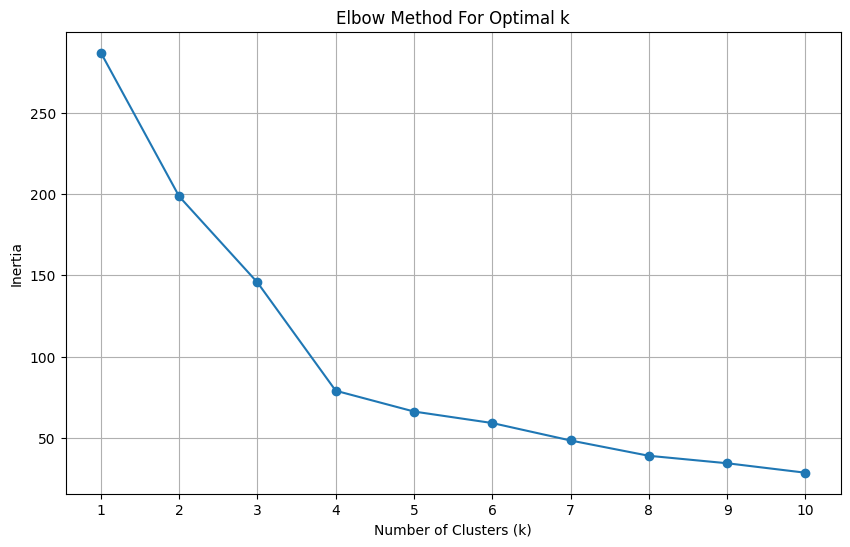

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [68]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)


In [69]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data)

c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [70]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_data)

# View the resulting array of cluster values.
print("Cluster labels:", clusters)

Cluster labels: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [71]:
# Create a copy of the DataFrame
market_data_with_clusters = market_data_df.copy()

In [72]:

# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['cluster'] = clusters

# Display sample data
print(market_data_with_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

<Figure size 1000x600 with 0 Axes>

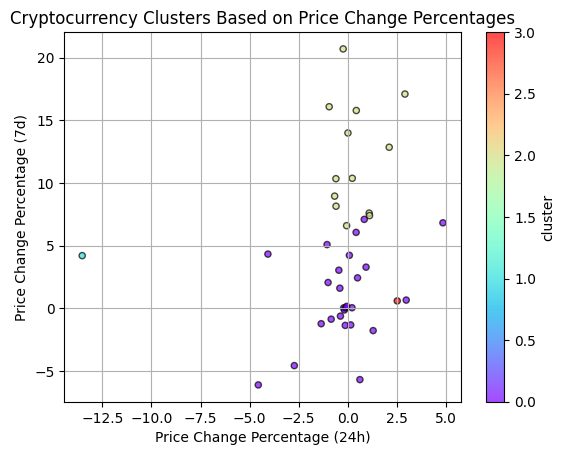

In [73]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
scatter = market_data_with_clusters.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    colormap='rainbow',
    alpha=0.7,
    edgecolor='k')

plt.title('Cryptocurrency Clusters Based on Price Change Percentages')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid()
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [74]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [75]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, \
    columns=[f'PC{i+1}' for i in range(3)])

# View the first five rows of the DataFrame. 
pca_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [76]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:", \
    explained_variance)

total_explained_variance = np.sum(explained_variance)
print("Total Explained Variance for the three principal components:", \
      total_explained_variance)

Explained Variance Ratio for each Principal Component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance for the three principal components: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [77]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(3)])


# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index
pca_df['name'] = crypto_names
# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PC1,PC2,PC3,name
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,None
ethereum,-0.458261,0.458466,0.952877,None
tether,-0.433070,-0.168126,-0.641752,None
ripple,-0.471835,-0.222660,-0.479053,None
bitcoin-cash,-1.157800,2.041209,1.859715,None


### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
    inertia.append(kmeans.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


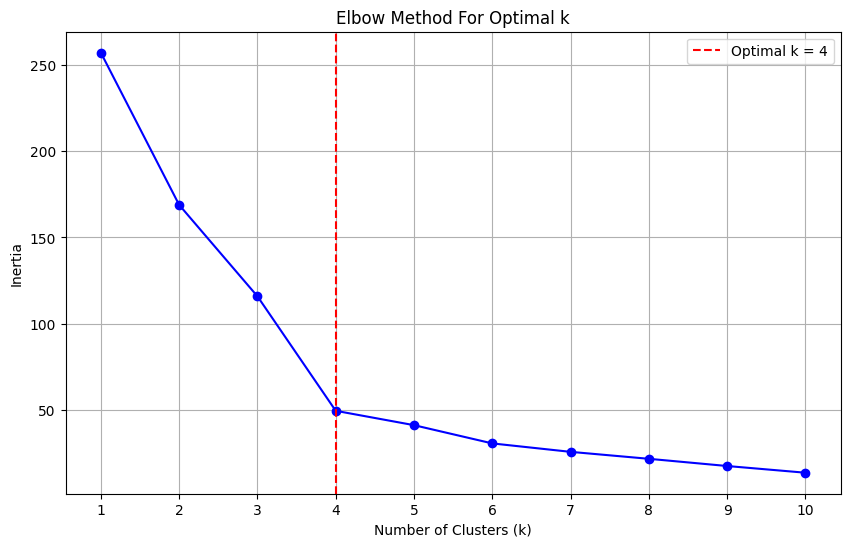

In [79]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid()
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')  
plt.legend()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [80]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [81]:
# Fit the K-Means model using the PCA data
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [82]:
# Predict the clusters to group the cryptocurrencies using the PCA data
kmeans.fit(pca_df[['PC1', 'PC2', 'PC3']])
clusters = kmeans.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print("Cluster labels:", clusters)

Cluster labels: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


c:\Users\Busin\anaconda5\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [83]:
# Create a copy of the DataFrame with the PCA data
pca_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_with_clusters['cluster'] = clusters

# Display sample data
pca_with_clusters.head()

,PC1,PC2,PC3,name,cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,None,2
ethereum,-0.458261,0.458466,0.952877,None,2
tether,-0.433070,-0.168126,-0.641752,None,0
ripple,-0.471835,-0.222660,-0.479053,None,0
bitcoin-cash,-1.157800,2.041209,1.859715,None,2


In [84]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_with_clusters.hvplot.scatter( x='PC1',y='PC2',by='cluster',\
    title='PCA Scatter Plot by Clusters',xlabel='PC1',ylabel='PC2',size=100,\
    alpha=0.7,width=700,height=500)

### Determine the Weights of Each Feature on each Principal Component

In [96]:
# Use the columns from the original scaled DataFrame as the index.
pca_with_clusters.index = scaled_data_df.index
pca_with_clusters.head()



,PC1,PC2,PC3,name,cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,None,2
ethereum,-0.458261,0.458466,0.952877,None,2
tether,-0.433070,-0.168126,-0.641752,None,0
ripple,-0.471835,-0.222660,-0.479053,None,0
bitcoin-cash,-1.157800,2.041209,1.859715,None,2


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

    